notes:
- asterisk before list-variable name unpacks the list, for example: function(1, 2, 3) == function(\*[1, 2, 3])

# 0. Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos, pi

# 1. Genetic Algorithm

In [2]:
class GeneticAlgorithm:
    __slots__ = ['number_of_generations', 'population_size', 'crossover_prob', 'mutation_prob', 'population', 'target_function']
    
    def __init__(self, number_of_generations, population_size, crossover_prob, mutation_prob):
        self.number_of_generations = number_of_generations
        self.population_size = population_size
        self.crossover_prob = crossover_prob
        self.mutation_prob = mutation_prob
        self.population = None
        self.target_function = None
        
        pass
    
    def generate_population(self, dim, method):
        match method:
            case 'gauss':
                return np.random.normal(0, 1, dim)
            case 'uniform':
                return np.random.uniform(0, 1, dim)
            case _:
                raise Exception('Unkown population generation method')
    
    def calculate_proximity(self, source):
        proximity = np.zeros(len(source))
        for i, creature in enumerate(source):
            proximity[i] = self.target_function(*creature)
        return proximity
    
    def proximity2probabilities(self, proximity):
        proximity = 1 / proximity
        return proximity / np.sum(proximity)
    
    def select(self, source, count, probabilities):
        return source[np.random.choice(range(len(source)), size=count, replace=False, p=probabilities)]
    
    def crossover(self, parent_a, parent_b):
        if np.random.rand() < self.crossover_prob:
            break_point = np.random.randint(1, len(parent_a) - 1)
            child_a = np.append(parent_a[:break_point], parent_b[break_point:])
            child_b = np.append(parent_b[:break_point], parent_a[break_point:])
            
            return child_a, child_b
            
        return parent_a, parent_b
    
    def mutation(self, creature):
        for i, property in enumerate(creature):
            if np.random.rand() < self.mutation_prob:
                creature[i] += np.random.normal(0, 1)
                
        return creature
    
    def optimize(self, function, method, argc):
        solutions = []
        evaluations = []
        
        self.population = self.generate_population((self.population_size, argc), method)
        self.target_function = function
        
        for generation in range(self.number_of_generations):
            # crossover
            probabilites = self.proximity2probabilities(self.calculate_proximity(self.population))
            
            children = np.zeros((2 * self.population_size, argc))
            for i in range(0, 2 * self.population_size, 2):
                parent_a, parent_b = self.select(self.population, 2, probabilites)
                children[i], children[i + 1] = self.crossover(parent_a, parent_b)
            
            self.population = np.append(self.population, children, axis=0)
            
            # mutation
            probabilites = self.proximity2probabilities(self.calculate_proximity(self.population))
                
            mutated = np.zeros((self.population_size, argc))
            for i in range(self.population_size):
                creature = self.select(self.population, 1, probabilites)
                mutated[i] = self.mutation(creature)
            
            self.population = np.append(self.population, mutated, axis=0)
            
            # calculating proximity
            proximity = self.calculate_proximity(self.population)
            indexes = np.argsort(proximity)
            break_point = int(self.population_size * 0.1)
            
            top_ten = indexes[:break_point]
            rest = indexes[break_point:]
            rest_population = self.population[rest]
            new_generation_rest = self.select(rest_population, self.population_size - len(top_ten), self.proximity2probabilities(self.calculate_proximity(rest_population)))
            
            solutions.append(self.population[top_ten[0]])
            evaluations.append(proximity[top_ten[0]])
            
            self.population = np.append(self.population[top_ten], new_generation_rest, axis=0) 
        
        return (solutions, evaluations)

# 2. Functions to optimize

## 2.1. Sum of squares

In [3]:
def sum_of_squares(x, y, z):
    return x ** 2 + y ** 2 + z ** 2

## 2.2. Rastrigin function for n=5

In [4]:
def rastrigin_5d(a, b, c, d, e):
    return (
        10 * 5 + 
        a ** 2 - 10 * cos(2 * pi * a) +
        b ** 2 - 10 * cos(2 * pi * b) +
        c ** 2 - 10 * cos(2 * pi * c) +
        d ** 2 - 10 * cos(2 * pi * d) +
        e ** 2 - 10 * cos(2 * pi * e)
    )

# 3. Evaluating results

## 3.1. Sum of squares

In [5]:
ga_1 = GeneticAlgorithm(number_of_generations=200, population_size=100, mutation_prob=0.1, crossover_prob=0.1)
solutions_1, evaluations_1 = ga_1.optimize(sum_of_squares, 'gauss', 3)

In [6]:
len(solutions_1)

200

In [8]:
len(evaluations_1)

200

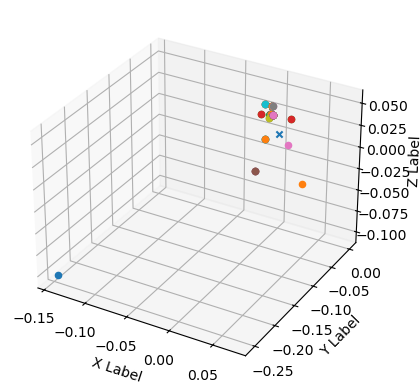

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for solution in solutions_1:
    ax.scatter(*solution)

ax.scatter(0, 0, 0, marker="x")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [7]:
print(f'proximity={evaluations_1[-1]} for solution={solutions_1[-1]}')

proximity=0.005457344497938764 for solution=[ 0.00442964 -0.0506424   0.05360103]


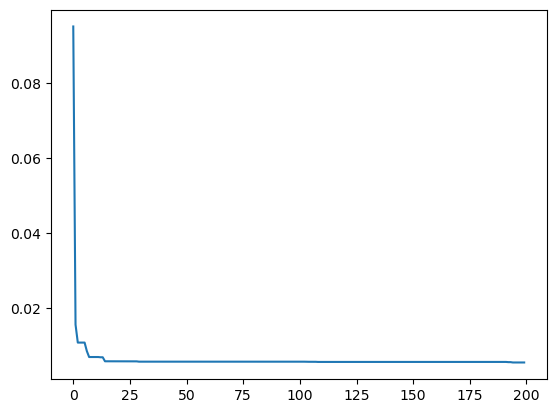

In [8]:
plt.plot(evaluations_1)

## 3.2. Rastrigin function for n=5

In [9]:
ga_2 = GeneticAlgorithm(number_of_generations=200, population_size=100, mutation_prob=0.1, crossover_prob=0.1)
solutions_2, evaluations_2 = ga_2.optimize(rastrigin_5d, 'gauss', 5)

In [10]:
print(f'proximity={evaluations_2[-1]} for solution={solutions_2[-1]}')

proximity=0.9014607583714884 for solution=[ 0.00977728  0.03498694 -0.00139709 -0.05702451 -0.00313031]


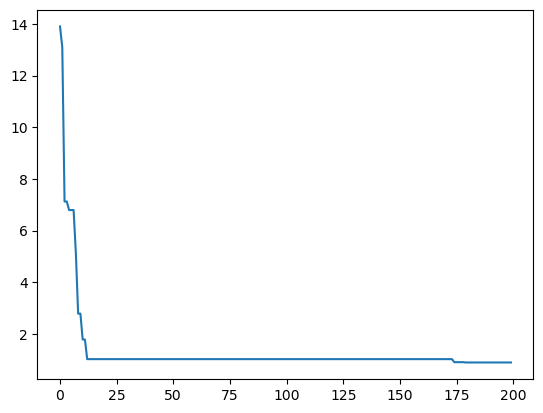

In [11]:
plt.plot(evaluations_2)